In [49]:
import pandas as pd
import numpy as np
import joblib as jb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv("house_data.csv")
df.head()

,size_sqrft,sold_price
0,743,480000
1,499,521990
2,499,419990
3,549,470000
4,813,640000


In [51]:
size_sqrft = df.iloc[:, :-1].values
sold_price = df.iloc[:, 1].values

In [52]:
size_sqrft_train, size_sqrft_test, sold_price_train, sold_price_test = train_test_split(size_sqrft, sold_price, test_size=0.2, random_state=0)
size_sqrft_train

array([[813],
       [657],
       [499],
       [600],
       [624],
       [549],
       [743],
       [599]])

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(size_sqrft_train, sold_price_train)

LinearRegression()

In [54]:
print(regressor.intercept_)

335293.3549485932


In [55]:
print(regressor.coef_)

[313.85585374]


In [56]:
regressor.predict([[500]])

array([492221.28181831])

In [57]:
jb.dump(regressor,'linear_regression_model')

['linear_regression_model']

In [58]:
mj = jb.load('linear_regression_model')

In [59]:
mj.predict([[500]])

array([492221.28181831])

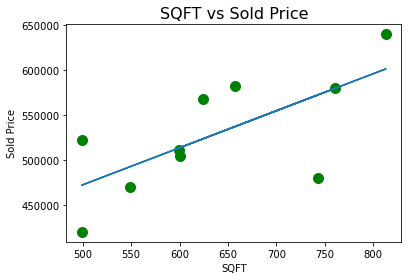

In [62]:
plt.scatter(df["size_sqrft"], df["sold_price"], color = 'g',s = 100)
plt.plot(df["size_sqrft"],fit_line)
plt.xlabel('SQFT')
plt.ylabel('Sold Price')
plt.title('SQFT vs Sold Price', fontsize = 16)
plt.show()